# 1. Designing our experiment

Formulating a hypothesis

First things first, we want to make sure we formulate a hypothesis at the start of our project. This will make sure our interpretation of the results is correct as well as rigorous.

Given we don’t know if the new design will perform better or worse (or the same?) as our current design, we’ll choose a two-tailed test:



Hₒ: p = pₒ

Hₐ: p ≠ pₒ


where p and pₒ stand for the conversion rate of the new and old design, respectively. We’ll also set a confidence level of 95%:

α = 0.05

The α value is a threshold we set, by which we say “if the probability of observing a result as extreme or more (p-value) is lower than α, then we reject the Null hypothesis”. Since our α=0.05 (indicating 5% probability), our confidence (1 — α) is 95%.

Don’t worry if you are not familiar with the above, all this really means is that whatever conversion rate we observe for our new design in our test, we want to be 95% confident it is statistically different from the conversion rate of our old design, before we decide to reject the Null hypothesis Hₒ.




# Choosing the variables


# Choosing a sample size

It is important to note that since we won’t test the whole user base (our population), the conversion rates that we’ll get will inevitably be only estimates of the true rates.

The number of people (or user sessions) we decide to capture in each group will have an effect on the precision of our estimated conversion rates: the larger the sample size, the more precise our estimates (i.e. the smaller our confidence intervals), the higher the chance to detect a difference in the two groups, if present.

On the other hand, the larger our sample gets, the more expensive (and impractical) our study becomes.


So how many people should we have in each group?



The sample size we need is estimated through something called Power analysis, and it depends on a few factors:

Power of the test (1 — β) — This represents the probability of finding a statistical difference between the groups in our test when a difference is actually present. This is usually set at 0.8 by convention (here’s more info on statistical power, if you are curious)

Alpha value (α) — The critical value we set earlier to 0.05

Effect size — How big of a difference we expect there to be between the conversion rates

Since our team would be happy with a difference of 2%, we can use 13% and 15% to calculate the effect size we expect.


Luckily, Python takes care of all these calculations for us:



In [1]:
# Packages imports
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.stats.api as sms
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from math import ceil

%matplotlib inline

# Some plot styling preferences
plt.style.use('seaborn-whitegrid')
font = {'family' : 'Helvetica',
        'weight' : 'bold',
        'size'   : 14}

mpl.rc('font', **font)
effect_size = sms.proportion_effectsize(0.13, 0.15)    # Calculating effect size based on our expected rates

required_n = sms.NormalIndPower().solve_power(
    effect_size, 
    power=0.8, 
    alpha=0.05, 
    ratio=1
    )                                                  # Calculating sample size needed

required_n = ceil(required_n)                          # Rounding up to next whole number                          

print(required_n)

4720


In [2]:
df = pd.read_csv('ab_data.csv', low_memory = False)
df

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
...,...,...,...,...,...
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


In [4]:
#The pd.crosstab() function in Pandas can be used to generate a cross-tabulation of two or more variables. 
#In this example, the function will generate a table showing the number of users in each group who landed on either the new 
#or the old page.

# To make sure all the control group are seeing the old page and viceversa


pd.crosstab(df['group'], df['landing_page'])

landing_page,new_page,old_page
group,,
control,1928,145274
treatment,145311,1965


In [5]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [6]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

In [7]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [8]:
df.tail()

,user_id,timestamp,group,landing_page,converted
294473,751197,2017-01-03 22:28:38.630509,control,old_page,0
294474,945152,2017-01-12 00:51:57.078372,control,old_page,0
294475,734608,2017-01-22 11:45:03.439544,control,old_page,0
294476,697314,2017-01-15 01:20:28.957438,control,old_page,0
294477,715931,2017-01-16 12:40:24.467417,treatment,new_page,0


In [9]:
df.dtypes

user_id                  int64
timestamp       datetime64[ns]
group                   object
landing_page            object
converted                int64
dtype: object

In [10]:
df.memory_usage()

Index               128
user_id         2355824
timestamp       2355824
group           2355824
landing_page    2355824
converted       2355824
dtype: int64

In [11]:
df['landing_page'].value_counts()

old_page    147239
new_page    147239
Name: landing_page, dtype: int64

In [12]:
df.columns

Index(['user_id', 'timestamp', 'group', 'landing_page', 'converted'], dtype='object')

In [13]:
df['landing_page'].unique()

array(['old_page', 'new_page'], dtype=object)

In [14]:
df['group'].unique()     

array(['control', 'treatment'], dtype=object)

In [15]:
df['converted'].unique()

array([0, 1], dtype=int64)

In [16]:
df.shape

(294478, 5)

We’ll actually only use the group and converted columns for the analysis.

In [17]:
#Before we go ahead and sample the data to get our subset, let’s make sure there are no users that have been sampled multiple 
#times.




session_counts = df['user_id'].value_counts(ascending=False)
session_counts

805339    2
754884    2
722274    2
783176    2
898232    2
         ..
642985    1
771499    1
923606    1
712675    1
715931    1
Name: user_id, Length: 290584, dtype: int64

In [18]:
multi_users = session_counts[session_counts > 1].count()
multi_users

#There are 3894 users that appear multiple times in the dataset

3894

There are, in fact, 3894 users that appear more than once. Since the number is pretty low, we’ll go ahead and remove them from the DataFrame to avoid sampling the same users twice.

In [19]:
users_to_drop = session_counts[session_counts > 1].index
users_to_drop

Int64Index([805339, 754884, 722274, 783176, 898232, 899018, 904570, 842042,
            881123, 858720,
            ...
            721188, 902463, 713355, 827417, 655283, 847058, 889392, 664150,
            835401, 736955],
           dtype='int64', length=3894)

In [20]:
# create a new dataframe that only contains rows where the value in the 'userid' column is in the list of users that should
#be dropped.


df = df[df['user_id'].isin(users_to_drop)]
df

,user_id,timestamp,group,landing_page,converted
22,767017,2017-01-12 22:58:14.991443,control,new_page,0
192,656468,2017-01-18 07:13:29.805052,treatment,new_page,1
226,773693,2017-01-23 18:05:45.167335,control,old_page,1
240,733976,2017-01-11 15:11:16.407599,control,new_page,0
246,704650,2017-01-04 19:10:52.655062,treatment,new_page,0
...,...,...,...,...,...
294308,905197,2017-01-03 06:56:47.488231,treatment,new_page,0
294309,787083,2017-01-17 00:15:20.950723,control,old_page,0
294328,641570,2017-01-09 21:59:27.695711,control,old_page,0
294331,689637,2017-01-13 11:34:28.339532,control,new_page,0


In [21]:
print(f'The updated dataset now has {df.shape[0]} entries')

The updated dataset now has 7788 entries


# Sampling

Now that our DataFrame is nice and clean, we can proceed and sample n=4720 entries for each of the groups. We can use pandas' DataFrame.sample() method to do this, which will perform Simple Random Sampling for us.

Note: I’ve set random_state=22 so that the results are reproducible if you feel like following on your own Notebook: just use random_state=22 in your function and you should get the same sample as I did.

In [22]:
control_sample = df[df['group'] == 'control'].sample(n=required_n, random_state=22, replace=True)

The sample() function can be used to select a random sample of rows from a pandas DataFrame. The syntax for this function is df.sample(n=required_n, random_state=22), where n is the number of rows that should be returned and random_state is an optional parameter that can be used to set the random seed. For example, if you have a dataframe called df and you want to select a random sample of 10 rows, you can use the following syntax:

df.sample(n=10, random_state=22)


In [23]:
control_sample

,user_id,timestamp,group,landing_page,converted
221866,829734,2017-01-14 03:03:42.391624,control,old_page,0
163516,744407,2017-01-22 06:07:14.901404,control,old_page,1
63060,725022,2017-01-17 03:14:08.496976,control,old_page,0
227527,712343,2017-01-18 12:24:53.754433,control,old_page,1
25439,643820,2017-01-12 13:33:49.016284,control,new_page,0
...,...,...,...,...,...
193109,925315,2017-01-10 10:50:36.582885,control,new_page,0
217998,878133,2017-01-23 12:26:41.296811,control,old_page,0
127059,733735,2017-01-18 14:01:58.758742,control,old_page,0
127513,833499,2017-01-14 21:45:35.776908,control,new_page,0


This error occurs when you try to sample more elements than are in the population you are sampling from. This can happen if you try to sample with replacement and set the argument replace=False, which means that you are trying to sample more elements than are in the population. To fix this, either reduce the sample size or switch the replace argument to True, which will allow for sampling with replacement.

In [24]:
treatment_sample = df[df['group'] == 'treatment'].sample(n=required_n, random_state=22, replace=True)
treatment_sample

,user_id,timestamp,group,landing_page,converted
223271,702158,2017-01-24 09:09:08.933970,treatment,new_page,0
167409,682994,2017-01-23 23:21:45.727603,treatment,old_page,0
63268,650709,2017-01-07 14:26:04.362371,treatment,new_page,0
230555,797683,2017-01-03 18:44:00.597550,treatment,new_page,0
28144,691288,2017-01-19 03:30:24.456339,treatment,new_page,0
...,...,...,...,...,...
136273,633126,2017-01-06 21:55:30.562348,treatment,old_page,0
203426,684541,2017-01-16 10:41:11.545518,treatment,old_page,1
31683,735427,2017-01-10 09:43:51.569918,treatment,new_page,0
9032,669901,2017-01-14 15:46:26.138223,treatment,old_page,0


In [25]:
ab_test = pd.concat([control_sample, treatment_sample], axis=0)
ab_test.reset_index(drop=True, inplace=True)

In [26]:
ab_test

,user_id,timestamp,group,landing_page,converted
0,829734,2017-01-14 03:03:42.391624,control,old_page,0
1,744407,2017-01-22 06:07:14.901404,control,old_page,1
2,725022,2017-01-17 03:14:08.496976,control,old_page,0
3,712343,2017-01-18 12:24:53.754433,control,old_page,1
4,643820,2017-01-12 13:33:49.016284,control,new_page,0
...,...,...,...,...,...
9435,633126,2017-01-06 21:55:30.562348,treatment,old_page,0
9436,684541,2017-01-16 10:41:11.545518,treatment,old_page,1
9437,735427,2017-01-10 09:43:51.569918,treatment,new_page,0
9438,669901,2017-01-14 15:46:26.138223,treatment,old_page,0


In [27]:
ab_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9440 entries, 0 to 9439
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   user_id       9440 non-null   int64         
 1   timestamp     9440 non-null   datetime64[ns]
 2   group         9440 non-null   object        
 3   landing_page  9440 non-null   object        
 4   converted     9440 non-null   int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 368.9+ KB


In [28]:
ab_test['group'].value_counts()

control      4720
treatment    4720
Name: group, dtype: int64

# we are now ready to analyse our results.

In [29]:
conversion_rates = ab_test.groupby('group')['converted']
conversion_rates

In [30]:
#std_p is a lambda function that takes in an input x and returns the standard deviation of x using the NumPy std function with 
#the ddof argument set to 0. The ddof argument is used to specify the divisor used in the calculation, 
#and setting it to 0 means that the divisor is the number of elements in the array.

std_p = lambda x: np.std(x, ddof=0)   # Std. deviation of the proportion
std_p

<function __main__.<lambda>(x)>

In [31]:
#se_p is a lambda function that takes in an input x and returns the standard error of the mean of x using the SciPy stats sem 
#function with the ddof argument set to 0. The ddof argument is used to specify the divisor used in the calculation, 
#and setting it to 0 means that the divisor is the number of elements in the array.

se_p = lambda x: stats.sem(x, ddof=0)      # Std. error of the proportion (std / sqrt(n))
se_p

<function __main__.<lambda>(x)>

In [32]:
conversion_rates = conversion_rates.agg([np.mean, std_p, se_p])
conversion_rates

,mean,<lambda_0>,<lambda_1>
group,,,
control,0.124364,0.329997,0.004803
treatment,0.124788,0.330479,0.004810


In [33]:
#This will rename the columns in the DataFrame to the specified names.


conversion_rates.columns = ['conversion_rate', 'std_deviation', 'std_error'] 

In [34]:
conversion_rates

,conversion_rate,std_deviation,std_error
group,,,
control,0.124364,0.329997,0.004803
treatment,0.124788,0.330479,0.004810


In [35]:
conversion_rates.style.format('{:.3f}')  # the format string '{:.3f}' is used, which will format the numbers 
#to three decimal places

#To format the conversion rates for a DataFrame in Pandas, you can use the conversion_rates.style.format() function. 
#This function takes a format string as an argument, and applies the format to each column in the DataFrame

,conversion_rate,std_deviation,std_error
group,,,
control,0.124,0.330,0.005
treatment,0.125,0.330,0.005


Judging by the stats above, it does look like our two designs performed very similarly, with our new design performing slightly better, approx. 12.3% vs. 12.6% conversion rate.

# Plotting the data

C:\Users\klaud\AppData\Local\Temp\ipykernel_17488\1510267236.py:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


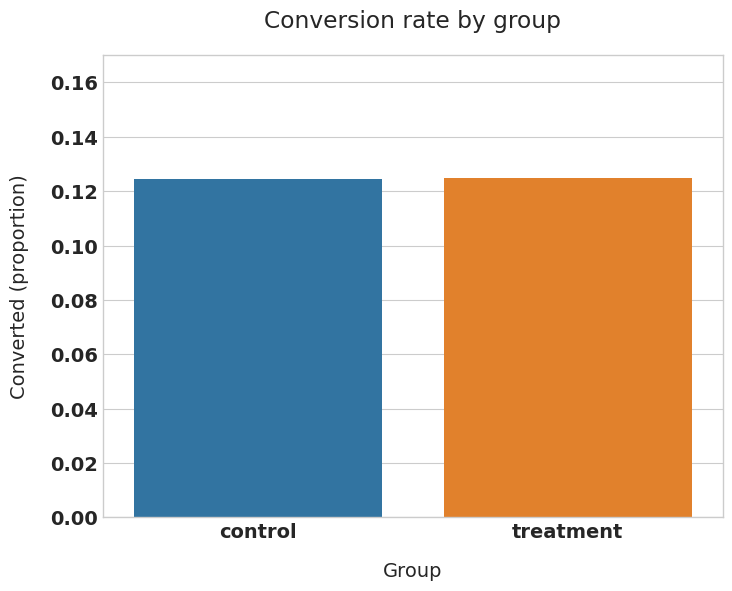

In [36]:
plt.figure(figsize=(8,6))

sns.barplot(x=ab_test['group'], y=ab_test['converted'], ci=False)

plt.ylim(0, 0.17)
plt.title('Conversion rate by group', pad=20)
plt.xlabel('Group', labelpad=15)
plt.ylabel('Converted (proportion)', labelpad=15);

The conversion rates for our groups are indeed very close. Also note that the conversion rate of the control group is lower than what we would have expected given what we knew about our avg. conversion rate (12.3% vs. 13%). This goes to show that there is some variation in results when sampling from a population.

So… the treatment group's value is higher. Is this difference statistically significant?

# 4. Testing the hypothesis


The last step of our analysis is testing our hypothesis. Since we have a very large sample, we can use the normal approximation for calculating our p-value (i.e. z-test).

Again, Python makes all the calculations very easy. We can use the statsmodels.stats.proportion module to get the p-value and confidence intervals:

In [37]:
from statsmodels.stats.proportion import proportions_ztest, proportion_confint
control_results = ab_test[ab_test['group'] == 'control']['converted']
treatment_results = ab_test[ab_test['group'] == 'treatment']['converted']
n_con = control_results.count()
n_treat = treatment_results.count()
successes = [control_results.sum(), treatment_results.sum()]
nobs = [n_con, n_treat]

z_stat, pval = proportions_ztest(successes, nobs=nobs)
(lower_con, lower_treat), (upper_con, upper_treat) = proportion_confint(successes, nobs=nobs, alpha=0.05)

print(f'z statistic: {z_stat:.2f}')
print(f'p-value: {pval:.3f}')
print(f'ci 95% for control group: [{lower_con:.3f}, {upper_con:.3f}]')
print(f'ci 95% for treatment group: [{lower_treat:.3f}, {upper_treat:.3f}]')

z statistic: -0.06
p-value: 0.950
ci 95% for control group: [0.115, 0.134]
ci 95% for treatment group: [0.115, 0.134]


# 5. Drawing conclusions